In [ ]:
import os
import pandas as pd

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

res_path = "outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv"
# res_path = "outputs-interpolation/INTERPOLATION-MIN/repairs_average.csv"
# res_path = "outputs-interpolation/INTERPOLATION-ALLGARS-INF/repairs_average.csv"
# res_path = "outputs-interpolation/INTERPOLATION-ALLGARS/repairs_average.csv"
# res_path = "outputs-symbolic/JVTS/repairs_average.csv"
# res_path = "outputs-symbolic/GLASS/repairs_average.csv"

# spectra_folder = "inputs/SIMPLE"
# spectra_folder = "inputs/AMBA-1"
# spectra_folder = "inputs/AMBA-2"
# spectra_folder = "inputs/SYNTECH15-UNREAL"
# spectra_folder = "inputs/SYNTECH15-1UNREAL"

# specs = [f for f in os.listdir(spectra_folder) if f.endswith('.spectra')]
# specs.sort()

specs = []
specs.extend(sorted([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')]))
specs.sort()

df = pd.DataFrame({"Filename": specs})

df_res = pd.read_csv(res_path)
df = df.merge(df_res[[
    "Filename",
    "NumRepairs",
    # "Effectiveness",
    # "UniqueEffectiveness",
    "TimeToFirst",
    "Runtime",
    # "TimeToFirst",
    # "NodesExplored",
    "Runs",
]], how="left", on="Filename")

# df["Repaired"] = df["NumRepairs"] > 0
# df = df[df["NumRepairs"] > 0]
# df = df[df["Repaired"] == True]
# df = df[df["Repaired"] == False]

# df = df[df["Runtime"] > 600]
# df = df[df["Runtime"] <= 600]

# df = df[df["NodesExplored"] < 3]
# df = df[df["NodesExplored"] == 1]
# df = df[df["NodesExplored"] >= 3]

# df = df[(df["Runs"] < 10) | (df['Runs'].isna())]

# df["System"] = df["Filename"].apply(lambda x: x[0])
# df = df[df["System"] == "H"]
# df = df.groupby("System").size().reset_index()

# df.to_csv("outputs/INTERPOLATION_repaired.csv")
# df.to_csv("outputs/JVTS_repaired.csv")

print(len(df))
# df.sort_values(by="TimeToFirst")
df

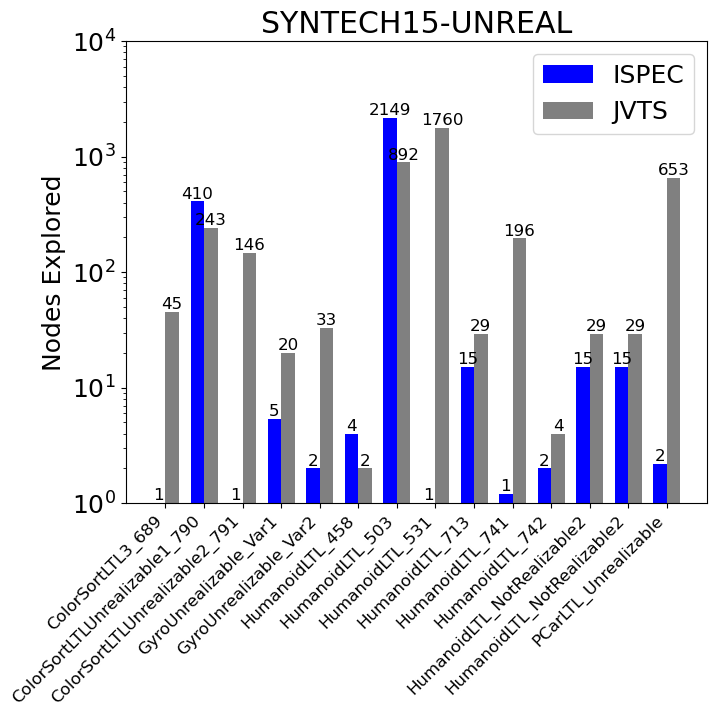

In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

# title = "SIMPLE"
title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"

column = "NodesExplored"
# column = "UniqueNodesExplored"
# column = "NumRepairs"
# column = "Effectiveness"
# column = "UniqueSols"
# column = "UniqueEffectiveness"
# column = "NodesToFirst"
# column = "DepthToFirst"
# column = "RefsPerDepth"
# column = "MaxDepth"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"
# column = "NodesPerSecond"

label = "Nodes Explored"
# label = "# Unique nodes explored"
# label = "# Solutions"
# label = "Effectiveness"
# label = "# Unique solutions"
# label = "# Nodes to first repair"
# label = "Depth to first repair"
# label = "# Refinements per depth"
# label = "Maximum depth"
# label = "# y-unsat w/o FALSE"
# label = "Nodes Per Second"

marker = "s" if len(df) < 20 else None

# Merge dataframes on 'Filename' to align both approaches
df_combined = pd.merge(df_interpolation, df_jvts, on='Filename', suffixes=('_interp', '_jvts'))

# Remove the '.spectra' extension from filenames for display
df_combined['Specification'] = df_combined['Filename'].str.replace('.spectra', '', regex=False)

df_combined['Specification'] = df_combined['Specification'].apply(lambda x: '_'.join(x.split('_')[:2]))


# Extract data for plotting
specifications = df_combined['Specification']
nodes_explored_interp = df_combined['NodesExplored_interp']
nodes_explored_jvts = df_combined['NodesExplored_jvts']

# Define the positions for the bars
x = range(len(specifications))
bar_width = 0.35

# Set global font size
plt.rcParams.update({'font.size': 18})

# Create the bar plot
plt.figure(figsize=(7.5, 6))
bars_interp = plt.bar(x, nodes_explored_interp, width=bar_width, label='ISPEC', color='blue')
bars_jvts = plt.bar([p + bar_width for p in x], nodes_explored_jvts, width=bar_width, label='JVTS', color='grey')

# Set y-axis to logarithmic scale for better visualization of wide ranges
plt.yscale('log')

# Add labels and title
plt.ylabel(label)
plt.title(title)
plt.xticks([p + bar_width / 2 for p in x], specifications, rotation=45, ha='right', fontsize=12)
# Adjust y-axis limit to ensure there's enough space for annotations
plt.ylim(1, 10**4)  # Add 10% padding
plt.legend()

# Annotate bars with their respective values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.0f}',
            ha='center',
            va='bottom',
            fontsize=12
        )

annotate_bars(bars_interp)
annotate_bars(bars_jvts)

# Show plot with tight layout
# plt.tight_layout()
plt.show()

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    "inputs/AMBA-1",
    "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()
print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

title = "SIMPLE"
# title = "AMBA-CAV17"
# title = "AMBA-SYM19"
# title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"

# column = "NodesExplored"
# column = "UniqueNodesExplored"
# column = "NumRepairs"
# column = "Effectiveness"
# column = "UniqueSols"
# column = "UniqueEffectiveness"
# column = "NodesToFirst"
# column = "DepthToFirst"
# column = "RefsPerDepth"
# column = "MaxDepth"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"
# column = "NodesPerSecond"
column = "DuplicateNodes"

# label = "# Nodes Explored"
# label = "# Unique nodes explored"
# label = "# Solutions"
# label = "Effectiveness"
# label = "# Unique solutions"
# label = "# Nodes to first repair"
# label = "Depth to first repair"
# label = "# Refinements per depth"
# label = "Maximum depth"
# label = "# y-unsat w/o FALSE"
# label = "Nodes Per Second"
label = "# Duplicate Nodes"

marker = "s" if len(df) < 20 else None

# df_interpolation.sort_values(by=[column], inplace=True)
# df_jvts.sort_values(by=[column], inplace=True)

# condition_1 = df_interpolation[column] == df_jvts[column]
# condition_2 = df_interpolation[column] > df_jvts[column]
# condition_3 = df_interpolation[column] < df_jvts[column]

# pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_rows', 10)

# print("LEN:", len(df_interpolation[condition_1]))
# # print(df_interpolation[condition_1]["Filename"])
# print()
# print("LEN:", len(df_interpolation[condition_2]))
# print(df_interpolation[condition_2]["Filename"])
# print()
# print("LEN:", len(df_interpolation[condition_3]))
# print(df_interpolation[condition_3]["Filename"])
# print()

# df_interpolation = pd.concat([df_interpolation[condition_1], df_interpolation[condition_2], df_interpolation[condition_3]])
# df_jvts = pd.concat([df_jvts[condition_1], df_jvts[condition_2], df_jvts[condition_3]])

x_ticks = range(1, len(df)+1)

# Calculate median
# median_ispec = df_interpolation[column].median()
median_ispec = df_interpolation[column].mean()
median_jvts = df_jvts[column].mean()

# plt.figure(figsize=(6.2, 5))
plt.title(title)
plt.rcParams.update({'font.size': 16})


epsilon = 0
# epsilon = 1e-2

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column] + epsilon, label='ISPEC', color='blue', marker=marker)
plt.plot(x_ticks, df_jvts[column] + epsilon, label='JVTS-Repair', color='red', marker=marker)

# Plot medians
plt.axhline(y=median_ispec, color='blue', linestyle='--')
plt.axhline(y=median_jvts, color='red', linestyle='--')

# Annotate median lines

# SIMPLE NODES
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# SIMPLE REPAIRS
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# AMBA-CAV17
# plt.text(len(df) - 0.1, median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='left', fontsize=14)
# plt.text(len(df) - 0.1, median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='left', fontsize=14)

# AMBA-SYM19
# plt.text(len(df), median_ispec * 0.85, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 1.4, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=14)

# SYNTECH15-UNREAL
# plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='center', fontsize=12)
# plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=12)

# SYNTECH15-UNREAL REPAIRS
plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='center', fontsize=12)
plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=12)

# Add labels and title
# plt.xlabel('Case study')
plt.ylabel(label)

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

if len(df) < 20:
    plt.xticks(x_ticks, df['Specification'], rotation=90, fontsize=12)
    # plt.xticks(x_ticks, df['Specification'], fontsize=12)

# plt.yticks([i/10 for i in range(11)])
plt.yscale('log')
plt.ylim(0.5, 10**4)

# plt.hlines(y=20, xmin=0, xmax=14)

# Place legend on the right outside of the graph
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
# plt.legend()
plt.grid()
plt.show()

                                              Filename
0                                          LGS.spectra
1                                         Lift.spectra
2                                           RG.spectra
3                                          RG1.spectra
4                                          RG2.spectra
5                                       amba02.spectra
6                         amba02_noassumptions.spectra
7                              amba02_nosafety.spectra
8                             amba02_nosafety0.spectra
9                             amba02_nosafety1.spectra
10                  amba02_nosafety_nofairness.spectra
11                                      amba04.spectra
12                            amba04_no_safety.spectra
13                          amba04_no_safety_0.spectra
14                        amba04_noassumptions.spectra
15                  amba04_nosafety_nofairness.spectra
16                                      amba08.spectra
17        

KeyError: 'DuplicateNodes'

/tmp/ipykernel_1365/4289738445.py:116: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


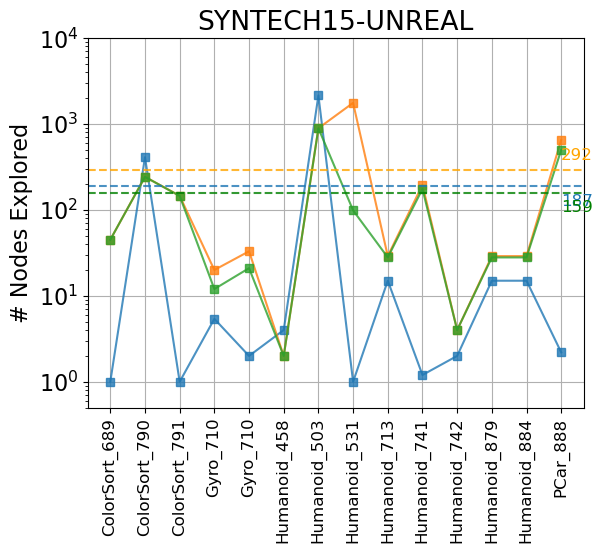

In [90]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# title = "SIMPLE"
# title = "AMBA-CAV17"
# title = "AMBA-SYM19"
title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()
# print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

column = "NodesExplored"

label = "# Nodes Explored"

marker = "s"

x_ticks = range(1, len(df)+1)

# Calculate median
y1 = df_interpolation[column].mean()
y2 = df_jvts[column].mean()
y3 = df_jvts["Unique" + column].mean()

# plt.figure(figsize=(6.2, 5))
plt.title(title)
plt.rcParams.update({'font.size': 16})

alpha = 0.8

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column] + epsilon, label='ISPEC', marker=marker, alpha=alpha)
plt.plot(x_ticks, df_jvts[column] + epsilon, label='JVTS-Repair', marker=marker, alpha=alpha)
plt.plot(x_ticks, df_jvts["Unique" + column] + epsilon, label='JVTS-Repair (unique)', marker=marker, alpha=alpha)

# Plot medians
plt.axhline(y=y1, linestyle='--', alpha=alpha)
plt.axhline(y=y2, color='orange', linestyle='--', alpha=alpha)
plt.axhline(y=y3, color='green', linestyle='--', alpha=alpha)

# Annotate median lines

# SIMPLE
plt.text(len(df), y1 * 0.6, f'{y1:.0f}', color='#1f77b4', fontsize=12)
plt.text(len(df), y2 * 1.3, f'{y2:.0f}', color='orange', fontsize=12)
plt.text(len(df), y3 * 0.6, f'{y3:.0f}', color='green', fontsize=12)

# AMBA-CAV17
# plt.text(len(df), y1 * 0.6, f'{y1:.0f}', color='#1f77b4', fontsize=12)
# plt.text(len(df), y2 * 1.3, f'{y2:.0f}', color='orange', fontsize=12)
# plt.text(len(df), y3 * 0.6, f'{y3:.0f}', color='green', fontsize=12)

# AMBA-SYM19
# plt.text(len(df), y1 * 0.6, f'{y1:.0f}', color='#1f77b4', fontsize=12)
# plt.text(len(df), y2 * 1.3, f'{y2:.0f}', color='orange', fontsize=12)
# plt.text(len(df), y3 * 0.6, f'{y3:.0f}', color='green', fontsize=12)

# SYNTECH15-UNREAL
# plt.text(len(df), y1 * 1.2, f'{y1:.0f}', color='#1f77b4', fontsize=12)
# plt.text(len(df), y2 * 1.2, f'{y2:.0f}', color='orange', fontsize=12)
# plt.text(len(df), y3 * 0.6, f'{y3:.0f}', color='green', fontsize=12)

# Add labels and title
# plt.xlabel('Case study')
plt.ylabel(label)

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

if len(df) < 20:
    plt.xticks(x_ticks, df['Specification'], rotation=90, fontsize=12)
    # plt.xticks(x_ticks, df['Specification'], fontsize=12)

# plt.yticks([i/10 for i in range(11)])
plt.yscale('log')
plt.ylim(0.5, 10**4)

# plt.hlines(y=20, xmin=0, xmax=14)

# Place legend on the right outside of the graph
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
# plt.legend()
plt.grid()
plt.show()

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

print("== NODES EXPLORED ==\n")

print(round(df_interpolation["NodesExplored"].median(), 0))
print(round(df_interpolation["NodesExplored"].mean(), 0))

print(round(df_jvts["NodesExplored"].median(), 0))
print(round(df_jvts["NodesExplored"].mean(), 0))

print(round(df_jvts["UniqueNodesExplored"].median(), 0))
print(round(df_jvts["UniqueNodesExplored"].mean(), 0))

print("\n== NUM REPAIRS ==\n")

print(round(df_interpolation["NumRepairs"].median(), 0))
print(round(df_interpolation["NumRepairs"].mean(), 0))

print(round(df_jvts["NumRepairs"].median(), 0))
print(round(df_jvts["NumRepairs"].mean(), 0))

print(round(df_jvts["UniqueSols"].median(), 0))
print(round(df_jvts["UniqueSols"].mean(), 0))

print("\n== EFFECTIVENESS ==\n")

print(round(df_interpolation["Effectiveness"].median(), 2))
print(round(df_interpolation["Effectiveness"].mean(), 2))

print(round(df_jvts["Effectiveness"].median(), 2))
print(round(df_jvts["Effectiveness"].mean(), 2))

print(round(df_jvts["UniqueEffectiveness"].median(), 2))
print(round(df_jvts["UniqueEffectiveness"].mean(), 2))

== NODES EXPLORED ==

8.0
9.0
23.0
273.0
20.0
126.0

== NUM REPAIRS ==

4.0
4.0
15.0
218.0
12.0
71.0

== EFFECTIVENESS ==

0.53
0.6
0.78
0.81
0.63
0.69


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

df_interpolation['Group'] = df_interpolation['Filename'].str.extract('(amba02|amba04|amba08)', expand=False)
df_jvts['Group'] = df_jvts['Filename'].str.extract('(amba02|amba04|amba08)', expand=False)

print("== NODES EXPLORED ==\n")

print(df_interpolation.groupby('Group')["NodesExplored"].median().round(0))
print(df_interpolation.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["NodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueNodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["UniqueNodesExplored"].mean().round(0))

print("\n== NODES EXPLORED ==\n")

print(df_interpolation.groupby('Group')["NumRepairs"].median().round(0))
print(df_interpolation.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["NumRepairs"].median().round(0))
print(df_jvts.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueSols"].median().round(0))
print(df_jvts.groupby('Group')["UniqueSols"].mean().round(0))

print("\n== EFFECTIVENESS ==\n")

print(df_interpolation.groupby('Group')["Effectiveness"].median().round(2))
print(df_interpolation.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["Effectiveness"].median().round(2))
print(df_jvts.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["UniqueEffectiveness"].median().round(2))
print(df_jvts.groupby('Group')["UniqueEffectiveness"].mean().round(2))

== NODES EXPLORED ==

Group
amba02    8.0
amba04    9.0
amba08    1.0
Name: NodesExplored, dtype: float64
Group
amba02    68.0
amba04    39.0
amba08     1.0
Name: NodesExplored, dtype: float64
Group
amba02    194.0
amba04     35.0
amba08      4.0
Name: NodesExplored, dtype: float64
Group
amba02    252.0
amba04    230.0
amba08    192.0
Name: NodesExplored, dtype: float64
Group
amba02    178.0
amba04     35.0
amba08      4.0
Name: UniqueNodesExplored, dtype: float64
Group
amba02    232.0
amba04    230.0
amba08    191.0
Name: UniqueNodesExplored, dtype: float64

== NODES EXPLORED ==

Group
amba02    0.0
amba04    3.0
amba08    0.0
Name: NumRepairs, dtype: float64
Group
amba02    22.0
amba04     4.0
amba08     0.0
Name: NumRepairs, dtype: float64
Group
amba02    0.0
amba04    0.0
amba08    0.0
Name: NumRepairs, dtype: float64
Group
amba02    0.0
amba04    0.0
amba08    0.0
Name: NumRepairs, dtype: float64
Group
amba02    0.0
amba04    0.0
amba08    0.0
Name: UniqueSols, dtype: float64
Grou

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

df_interpolation['Group'] = df_interpolation['Filename'].str.extract('(w_guar_fairness|w_guar_trans|wo_ass_fairness)', expand=False)
df_jvts['Group'] = df_jvts['Filename'].str.extract('(w_guar_fairness|w_guar_trans|wo_ass_fairness)', expand=False)

print("== NODES EXPLORED ==\n")

print(df_interpolation.groupby('Group')["NodesExplored"].median().round(0))
print(df_interpolation.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["NodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueNodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["UniqueNodesExplored"].mean().round(0))

print("\n== NUM REPAIRS ==\n")

print(df_interpolation.groupby('Group')["NumRepairs"].median().round(0))
print(df_interpolation.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["NumRepairs"].median().round(0))
print(df_jvts.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueSols"].median().round(0))
print(df_jvts.groupby('Group')["UniqueSols"].mean().round(0))

print("\n== EFFECTIVENESS ==\n")

print(df_interpolation.groupby('Group')["Effectiveness"].median().round(2))
print(df_interpolation.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["Effectiveness"].median().round(2))
print(df_jvts.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["UniqueEffectiveness"].median().round(2))
print(df_jvts.groupby('Group')["UniqueEffectiveness"].mean().round(2))

== NODES EXPLORED ==

Group
w_guar_fairness    101.0
w_guar_trans         3.0
wo_ass_fairness     18.0
Name: NodesExplored, dtype: float64
Group
w_guar_fairness    99.0
w_guar_trans        3.0
wo_ass_fairness    21.0
Name: NodesExplored, dtype: float64
Group
w_guar_fairness     98.0
w_guar_trans         2.0
wo_ass_fairness    302.0
Name: NodesExplored, dtype: float64
Group
w_guar_fairness    142.0
w_guar_trans         2.0
wo_ass_fairness    445.0
Name: NodesExplored, dtype: float64
Group
w_guar_fairness     97.0
w_guar_trans         2.0
wo_ass_fairness    264.0
Name: UniqueNodesExplored, dtype: float64
Group
w_guar_fairness    142.0
w_guar_trans         2.0
wo_ass_fairness    318.0
Name: UniqueNodesExplored, dtype: float64

== NUM REPAIRS ==

Group
w_guar_fairness     4.0
w_guar_trans        0.0
wo_ass_fairness    12.0
Name: NumRepairs, dtype: float64
Group
w_guar_fairness     6.0
w_guar_trans        0.0
wo_ass_fairness    10.0
Name: NumRepairs, dtype: float64
Group
w_guar_fairness    

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

df_interpolation['Group'] = df_interpolation['Filename'].str.extract('(ColorSort|Gyro|Humanoid|PCar)', expand=False)
df_jvts['Group'] = df_jvts['Filename'].str.extract('(ColorSort|Gyro|Humanoid|PCar)', expand=False)

print("== NODES EXPLORED ==\n")

print(df_interpolation.groupby('Group')["NodesExplored"].median().round(0))
print(df_interpolation.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["NodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["NodesExplored"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueNodesExplored"].median().round(0))
print(df_jvts.groupby('Group')["UniqueNodesExplored"].mean().round(0))

print("\n== NUM REPAIRS ==\n")

print(df_interpolation.groupby('Group')["NumRepairs"].median().round(0))
print(df_interpolation.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["NumRepairs"].median().round(0))
print(df_jvts.groupby('Group')["NumRepairs"].mean().round(0))

print(df_jvts.groupby('Group')["UniqueSols"].median().round(0))
print(df_jvts.groupby('Group')["UniqueSols"].mean().round(0))

print("\n== EFFECTIVENESS ==\n")

print(df_interpolation.groupby('Group')["Effectiveness"].median().round(2))
print(df_interpolation.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["Effectiveness"].median().round(2))
print(df_jvts.groupby('Group')["Effectiveness"].mean().round(2))

print(df_jvts.groupby('Group')["UniqueEffectiveness"].median().round(2))
print(df_jvts.groupby('Group')["UniqueEffectiveness"].mean().round(2))

df_jvts[["Filename", "NumRepairs", "NodesExplored", "Effectiveness"]]
df_interpolation[["Filename", "NumRepairs", "NodesExplored", "Effectiveness"]]

== NODES EXPLORED ==

Group
ColorSort     1.0
Gyro          4.0
Humanoid     10.0
PCar          2.0
Name: NodesExplored, dtype: float64
Group
ColorSort    137.0
Gyro           4.0
Humanoid     275.0
PCar           2.0
Name: NodesExplored, dtype: float64
Group
ColorSort    146.0
Gyro          26.0
Humanoid      29.0
PCar         653.0
Name: NodesExplored, dtype: float64
Group
ColorSort    145.0
Gyro          26.0
Humanoid     368.0
PCar         653.0
Name: NodesExplored, dtype: float64
Group
ColorSort    146.0
Gyro          16.0
Humanoid      28.0
PCar         499.0
Name: UniqueNodesExplored, dtype: float64
Group
ColorSort    144.0
Gyro          16.0
Humanoid     157.0
PCar         499.0
Name: UniqueNodesExplored, dtype: float64

== NUM REPAIRS ==

Group
ColorSort    0.0
Gyro         2.0
Humanoid     2.0
PCar         0.0
Name: NumRepairs, dtype: float64
Group
ColorSort    0.0
Gyro         2.0
Humanoid     3.0
PCar         0.0
Name: NumRepairs, dtype: float64
Group
ColorSort      0.0
Gyr

,Filename,NumRepairs,NodesExplored,Effectiveness
0,ColorSortLTL3_689_ColorSort_fixed_unrealizable...,0.0,1.0,0.000000
1,ColorSortLTLUnrealizable1_790_ColorSort_unreal...,0.1,410.4,0.000259
2,ColorSortLTLUnrealizable2_791_ColorSort_unreal...,0.0,1.0,0.000000
3,GyroUnrealizable_Var1_710_GyroAspect_unrealiza...,2.8,5.4,0.680000
4,GyroUnrealizable_Var2_710_GyroAspect_unrealiza...,1.0,2.0,1.000000
5,HumanoidLTL_458_Humanoid_fixed_unrealizable.sp...,2.0,4.0,0.666667
6,HumanoidLTL_503_Humanoid_fixed_unrealizable.sp...,0.0,2149.3,0.000000
7,HumanoidLTL_531_Humanoid_unrealizable.spectra,0.0,1.0,0.000000
8,HumanoidLTL_713_Humanoid_unrealizable.spectra,7.0,15.0,0.500000
9,HumanoidLTL_741_Humanoid_unrealizable.spectra,0.2,1.2,1.000000


In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

df["ISPEC"] = df_interpolation["Effectiveness"]
df["JVTS-Repair"] = df_jvts["Effectiveness"]
df["JVTS-Repair (unique)"] = df_jvts["UniqueEffectiveness"]
# df = df[df["ISPEC"] != 0]
df.round(2)

,Filename,ISPEC,JVTS-Repair,JVTS-Repair (unique)
0,ColorSortLTL3_689_ColorSort_fixed_unrealizable...,0.00,0.00,0.00
1,ColorSortLTLUnrealizable1_790_ColorSort_unreal...,0.00,0.00,0.00
2,ColorSortLTLUnrealizable2_791_ColorSort_unreal...,0.00,0.00,0.00
3,GyroUnrealizable_Var1_710_GyroAspect_unrealiza...,0.68,0.79,0.64
4,GyroUnrealizable_Var2_710_GyroAspect_unrealiza...,1.00,0.75,0.60
5,HumanoidLTL_458_Humanoid_fixed_unrealizable.sp...,0.67,1.00,1.00
6,HumanoidLTL_503_Humanoid_fixed_unrealizable.sp...,0.00,0.00,0.00
7,HumanoidLTL_531_Humanoid_unrealizable.spectra,0.00,0.58,0.06
8,HumanoidLTL_713_Humanoid_unrealizable.spectra,0.50,0.00,0.00
9,HumanoidLTL_741_Humanoid_unrealizable.spectra,1.00,0.00,0.00


                                             Filename
0   ColorSortLTL3_689_ColorSort_fixed_unrealizable...
1   ColorSortLTLUnrealizable1_790_ColorSort_unreal...
2   ColorSortLTLUnrealizable2_791_ColorSort_unreal...
3   GyroUnrealizable_Var1_710_GyroAspect_unrealiza...
4   GyroUnrealizable_Var2_710_GyroAspect_unrealiza...
5   HumanoidLTL_458_Humanoid_fixed_unrealizable.sp...
6   HumanoidLTL_503_Humanoid_fixed_unrealizable.sp...
7       HumanoidLTL_531_Humanoid_unrealizable.spectra
8       HumanoidLTL_713_Humanoid_unrealizable.spectra
9       HumanoidLTL_741_Humanoid_unrealizable.spectra
10      HumanoidLTL_742_Humanoid_unrealizable.spectra
11  HumanoidLTL_NotRealizable2_879_Humanoid_unreal...
12  HumanoidLTL_NotRealizable2_884_Humanoid_unreal...
13  PCarLTL_Unrealizable_V_2_unrealizable0_888_PCa...


/tmp/ipykernel_5194/1797382487.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


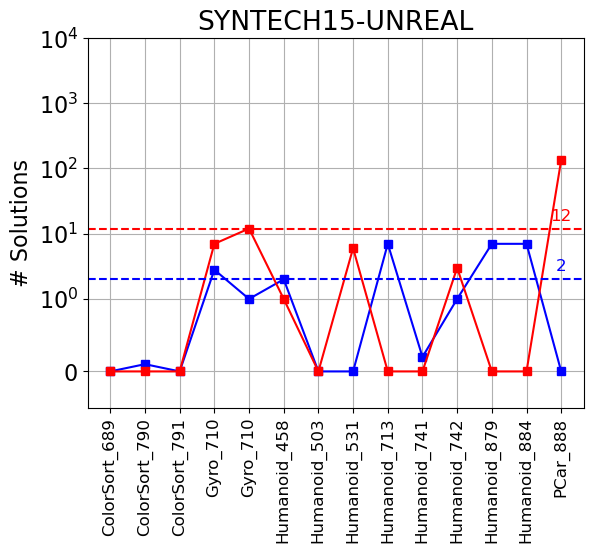

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

title = "SIMPLE"
# title = "AMBA-CAV17"
# title = "AMBA-SYM19"
# title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"


# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()
print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

# column = "NodesExplored"
# column = "UniqueNodesExplored"
# column = "NumRepairs"
# column = "Effectiveness"
column = "UniqueSols"
# column = "UniqueEffectiveness"
# column = "NodesToFirst"
# column = "DepthToFirst"
# column = "RefsPerDepth"
# column = "MaxDepth"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"
# column = "NodesPerSecond"

# label = "# Nodes Explored"
# label = "# Unique nodes explored"
label = "# Solutions"
# label = "Effectiveness"
# label = "# Unique solutions"
# label = "# Nodes to first repair"
# label = "Depth to first repair"
# label = "# Refinements per depth"
# label = "Maximum depth"
# label = "# y-unsat w/o FALSE"
# label = "Nodes Per Second"

marker = "s" if len(df) < 20 else None

# df_interpolation.sort_values(by=[column], inplace=True)
# df_jvts.sort_values(by=[column], inplace=True)

# condition_1 = df_interpolation[column] == df_jvts[column]
# condition_2 = df_interpolation[column] > df_jvts[column]
# condition_3 = df_interpolation[column] < df_jvts[column]

# pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_rows', 10)

# print("LEN:", len(df_interpolation[condition_1]))
# # print(df_interpolation[condition_1]["Filename"])
# print()
# print("LEN:", len(df_interpolation[condition_2]))
# print(df_interpolation[condition_2]["Filename"])
# print()
# print("LEN:", len(df_interpolation[condition_3]))
# print(df_interpolation[condition_3]["Filename"])
# print()

# df_interpolation = pd.concat([df_interpolation[condition_1], df_interpolation[condition_2], df_interpolation[condition_3]])
# df_jvts = pd.concat([df_jvts[condition_1], df_jvts[condition_2], df_jvts[condition_3]])

x_ticks = range(1, len(df)+1)

# Calculate median
# median_ispec = df_interpolation[column].median()
median_ispec = df_interpolation[column].mean()
# median_jvts = df_jvts[column].median()
median_jvts = df_jvts[column].mean()

# plt.figure(figsize=(6.2, 5))
plt.title(title)
plt.rcParams.update({'font.size': 16})


epsilon = 0
# epsilon = 1e-2

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column] + epsilon, label='ISPEC', color='blue', marker=marker)
plt.plot(x_ticks, df_jvts[column] + epsilon, label='JVTS-Repair', color='red', marker=marker)

# Plot medians
plt.axhline(y=median_ispec, color='blue', linestyle='--')
plt.axhline(y=median_jvts, color='red', linestyle='--')

# Annotate median lines

# SIMPLE NODES
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# SIMPLE REPAIRS
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# AMBA-CAV17
# plt.text(len(df) - 0.1, median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='left', fontsize=14)
# plt.text(len(df) - 0.1, median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='left', fontsize=14)

# AMBA-SYM19
# plt.text(len(df), median_ispec * 0.85, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 1.4, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=14)

# SYNTECH15-UNREAL
# plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='center', fontsize=12)
# plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=12)

# SYNTECH15-UNREAL REPAIRS
plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='center', fontsize=12)
plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=12)

# Add labels and title
# plt.xlabel('Case study')
plt.ylabel(label)

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

if len(df) < 20:
    plt.xticks(x_ticks, df['Specification'], rotation=90, fontsize=12)
    # plt.xticks(x_ticks, df['Specification'], fontsize=12)

# plt.yticks([i/10 for i in range(11)])
plt.yscale('symlog', linthresh=1)
plt.ylim(-0.5, 10**4)

# plt.hlines(y=20, xmin=0, xmax=14)

# Place legend on the right outside of the graph
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
# plt.legend()
plt.grid()
plt.show()

                              Filename
0                       amba02.spectra
1             amba02_nosafety0.spectra
2             amba02_nosafety1.spectra
3              amba02_nosafety.spectra
4   amba02_nosafety_nofairness.spectra
5         amba02_noassumptions.spectra
6                       amba04.spectra
7           amba04_no_safety_0.spectra
8             amba04_no_safety.spectra
9   amba04_nosafety_nofairness.spectra
10        amba04_noassumptions.spectra
11                      amba08.spectra
12          amba08_no_safety_0.spectra
13            amba08_no_safety.spectra
14  amba08_nosafety_nofairness.spectra
15        amba08_noassumptions.spectra


/tmp/ipykernel_1323/1642785764.py:144: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


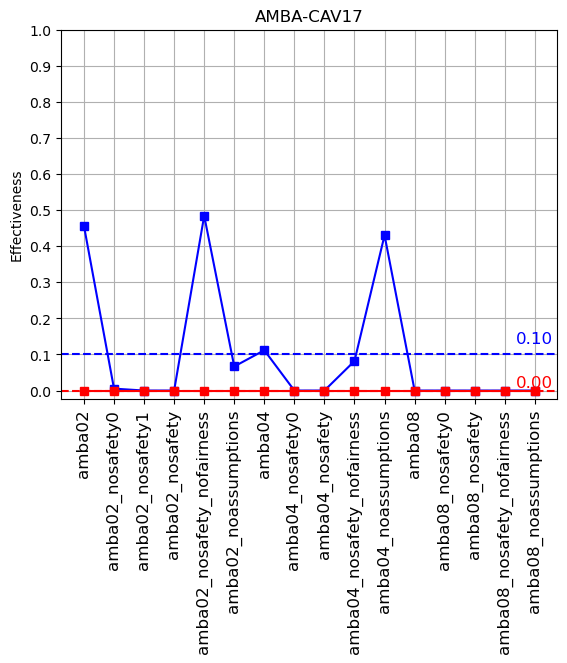

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

# title = "SIMPLE"
title = "AMBA-CAV17"
# title = "AMBA-SYM19"
# title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"


# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])
# df = df[df["System"] == "P"]

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

df = df.set_index("Filename").reindex(amba_files_order).reset_index()
print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

# column = "NodesExplored"
# column = "UniqueNodesExplored"
# column = "NumRepairs"
column = "Effectiveness"
# column = "UniqueSols"
# column = "UniqueEffectiveness"
# column = "NodesToFirst"
# column = "DepthToFirst"
# column = "RefsPerDepth"
# column = "MaxDepth"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"
# column = "NodesPerSecond"

# label = "# Nodes Explored"
# label = "# Unique nodes explored"
# label = "# Solutions"
label = "Effectiveness"
# label = "# Unique solutions"
# label = "# Nodes to first repair"
# label = "Depth to first repair"
# label = "# Refinements per depth"
# label = "Maximum depth"
# label = "# y-unsat w/o FALSE"
# label = "Nodes Per Second"

marker = "s" if len(df) < 20 else None

x_ticks = range(1, len(df)+1)

# Calculate median
median_ispec = df_interpolation[column].mean()
median_jvts = df_jvts[column].mean()

# plt.figure(figsize=(6.2, 5))
# plt.figure(figsize=(20, 5))
plt.title(title)
plt.rcParams.update({'font.size': 16})


epsilon = 0
# epsilon = 1e-2

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column] + epsilon, label='ISPEC', color='blue', marker=marker)
plt.plot(x_ticks, df_jvts[column] + epsilon, label='JVTS-Repair', color='red', marker=marker)

# Plot medians
plt.axhline(y=median_ispec, color='blue', linestyle='--')
plt.axhline(y=median_jvts, color='red', linestyle='--')

# Annotate median lines

# SIMPLE NODES
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# SIMPLE REPAIRS
# plt.text(len(df), median_ispec * 0.8, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 0.8, f'{median_jvts:.0f}', color='red', va='top', ha='center', fontsize=14)

# AMBA-CAV17
# plt.text(len(df) - 0.1, median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='left', fontsize=14)
# plt.text(len(df) - 0.1, median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='left', fontsize=14)

# AMBA-SYM19
# plt.text(len(df), median_ispec * 0.85, f'{median_ispec:.0f}', color='blue', va='top', ha='center', fontsize=14)
# plt.text(len(df), median_jvts * 1.4, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=14)

# SYNTECH15-UNREAL
# plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.0f}', color='blue', va='bottom', ha='center', fontsize=12)
# plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.0f}', color='red', va='bottom', ha='center', fontsize=12)

# SYNTECH15-UNREAL REPAIRS
plt.text(len(df), median_ispec * 1.2, f'{median_ispec:.2f}', color='blue', va='bottom', ha='center', fontsize=12)
plt.text(len(df), median_jvts * 1.2, f'{median_jvts:.2f}', color='red', va='bottom', ha='center', fontsize=12)

# Add labels and title
# plt.xlabel('Case study')
plt.ylabel(label)

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

if len(df) < 20:
    plt.xticks(x_ticks, df['Specification'], rotation=90, fontsize=12)
    # plt.xticks(x_ticks, df['Specification'], fontsize=12)

# plt.yticks([i/10 for i in range(11)])
# plt.yscale('symlog', linthresh=1)
# plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(0, 11)])

# plt.hlines(y=20, xmin=0, xmax=14)

# Place legend on the right outside of the graph
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
# plt.legend()
plt.grid()
plt.show()

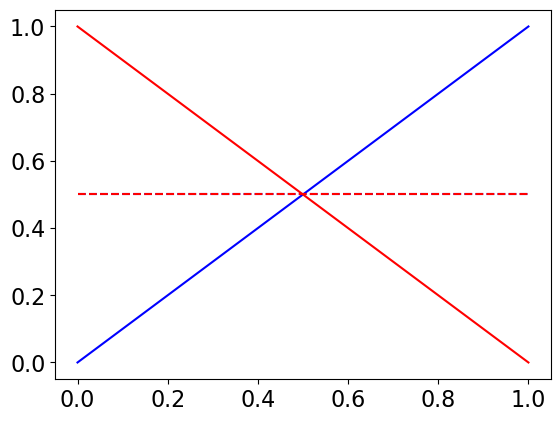

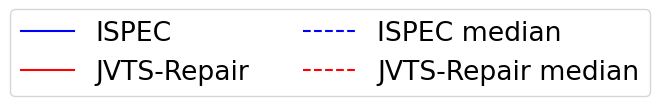

In [31]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot dummy data with specific styles for legend
# Plot the ISPEC line (solid blue)
line1, = ax.plot([0, 1], [0, 1], label="ISPEC", color='blue')

# Plot the JVTS-Repair line (solid red)
line2, = ax.plot([0, 1], [1, 0], label="JVTS-Repair", color='red')

# Plot the ISPEC median line (dashed blue)
line3, = ax.plot([0, 1], [0.5, 0.5], label="ISPEC median", color='blue', linestyle='--')

# Plot the JVTS-Repair median line (dashed red)
line4, = ax.plot([0, 1], [0.5, 0.5], label="JVTS-Repair median", color='red', linestyle='--')

# Create a new figure for the legend
fig_legend = plt.figure()

# Add the legend to the new figure with 2 columns
legend = fig_legend.legend(
    handles=[line1, line2, line3, line4],
    labels=['ISPEC', 'JVTS-Repair', 'ISPEC median', 'JVTS-Repair median'],
    loc='center',
    fontsize='large',
    ncol=2  # Specify 2 columns for the legend
)

# Calculate the size of the legend and set the figure size accordingly
fig_legend.canvas.draw()  # Draw the figure to calculate legend size
bbox = legend.get_window_extent().transformed(fig_legend.dpi_scale_trans.inverted())
legend_width, legend_height = bbox.width, bbox.height

# Set the size of the legend figure to match the legend size
fig_legend.set_size_inches(legend_width, legend_height)

# Remove axes from the figure with the legend
fig_legend.gca().axis('off')

# Display the figure with only the legend
plt.show()


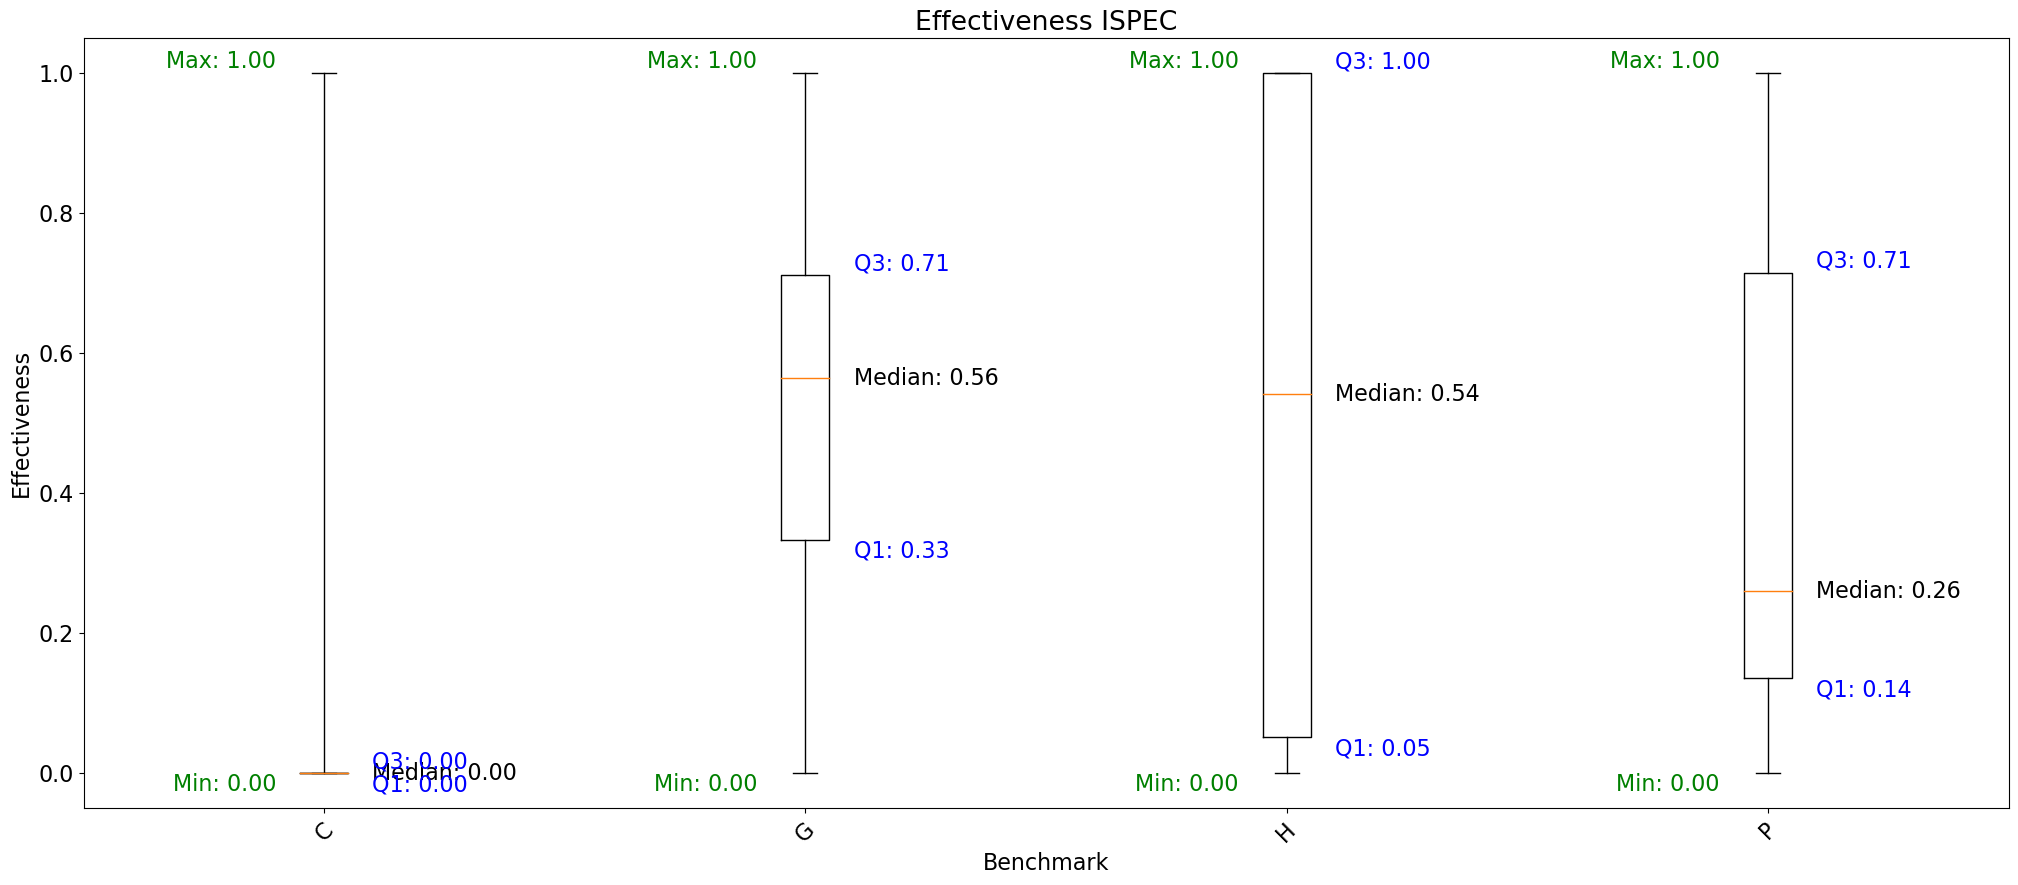

  System  Effectiveness
0      C       0.088020
1      G       0.509045
2      H       0.524595
3      P       0.423497
  System  Effectiveness
0      C       0.000068
1      G       0.583615
2      H       0.135356
3      P       0.281789


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
df["System"] = df["Filename"].apply(lambda x: x[0])

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

# df_jvts[["Filename", "NumRepairs", "NodesExplored", "Effectiveness", "UniqueSols", "UniqueNodesExplored", "UniqueEffectiveness"]].sort_values(by=["NodesExplored"])
# print(df_interpolation[["Filename", "NodesExplored", "Runtime", "NodesPerSecond"]].sort_values(by=["Filename"]))
# print(df_jvts[["Filename", "NodesExplored", "Runtime", "NodesPerSecond"]].sort_values(by=["Filename"]))


# df_jvts = df_jvts[df_jvts["Benchmark"] != "AMBA-1"]
# df_jvts = df_jvts[df_jvts["Benchmark"] != "AMBA-2"]

# df_interpolation = df_interpolation[df_interpolation["NumRepairs"] > 0]
# df_jvts = df_jvts[df_jvts["NumRepairs"] > 0]

# Prepare data for boxplot
# grouped = df_interpolation.groupby('Benchmark', sort=False)['NodesExplored'].apply(list)
# grouped = df_interpolation.groupby('Benchmark', sort=False)['NumRepairs'].apply(list)
# grouped = df_interpolation.groupby('System', sort=False)['Effectiveness'].apply(list)
grouped = df_interpolation.groupby('System', sort=False)['Effectiveness'].apply(list)
# grouped = df_jvts.groupby('Benchmark', sort=False)['NodesExplored'].apply(list)
# grouped = df_jvts.groupby('Benchmark', sort=False)['NumRepairs'].apply(list)
# grouped = df_jvts.groupby('Benchmark', sort=False)['Effectiveness'].apply(list)
# Convert grouped data into a list of lists (one for each benchmark)
data = [group for group in grouped]

# Create the box plot
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 16})
boxplot = plt.boxplot(data, labels=grouped.index, whis=[0,100], widths=0.1)
plt.subplots_adjust(right=1.5)

# Customize the plot
plt.title('Effectiveness ISPEC')
plt.xlabel('Benchmark')
plt.ylabel('Effectiveness')
# plt.yscale('log')
# plt.ylim(10**-1.5, 10**4)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

margin = 0.1
fontsize = 16

# Retrieve and annotate the box plot elements
for i, line in enumerate(boxplot['medians']):
    # Get the median value
    median = line.get_ydata()[0]
    # Annotate the median
    plt.text(i + 1 + margin, median, f'Median: {median:.2f}', ha='left', va='center', color='black')

for i, line in enumerate(boxplot['boxes']):
    # Get Q1, Q3 values
    Q1 = line.get_ydata()[0]
    Q3 = line.get_ydata()[2]
    # Annotate Q1 and Q3
    plt.text(i + 1 + margin, Q1, f'Q1: {Q1:.2f}', ha='left', va='top', color='blue')
    plt.text(i + 1 + margin, Q3, f'Q3: {Q3:.2f}', ha='left', va='bottom', color='blue')

# Annotate whiskers
for i, whisker in enumerate(boxplot['whiskers']):
    # Each pair of whiskers corresponds to one box plot, so index them accordingly
    if i % 2 == 0:  # Bottom whisker
        whisker_value = whisker.get_ydata()[1]
        plt.text((i//2) + 1 - margin, whisker_value, f'Min: {whisker_value:.2f}', ha='right', va='top', color='green')
    else:  # Top whisker
        whisker_value = whisker.get_ydata()[1]
        plt.text((i//2) + 1 - margin, whisker_value, f'Max: {whisker_value:.2f}', ha='right', va='bottom', color='green')

# # Show the plot
plt.show()







# # Create a figure and axis
# plt.figure(figsize=(10, 6))

# # Plotting two box plots side by side
# boxplot = plt.boxplot([df_interpolation['NodesExplored'], df_jvts['NodesExplored']], labels=['ISPEC', 'JVTS'], whis=[0,100])

# # Adding title and labels
# plt.title('Comparison of number of nodes explored between ISPEC and JVTS for SYNTECH15-REAL-VAR')
# plt.ylabel('Nodes Explored')
# plt.yscale('log')
# plt.ylim(10**-1, max(df_interpolation['NodesExplored'].max(), df_jvts['NodesExplored'].max()) * 5)
# plt.grid(True)


# # Retrieve and annotate the box plot elements
# for i, line in enumerate(boxplot['medians']):
#     # Get the median value
#     median = line.get_ydata()[0]
#     # Annotate the median
#     plt.text(i + 1.1, median, f'Median: {median:.1f}', ha='left', va='center', fontsize=12, color='black')

# for i, line in enumerate(boxplot['boxes']):
#     # Get Q1, Q3 values
#     Q1 = line.get_ydata()[0]
#     Q3 = line.get_ydata()[2]
#     # Annotate Q1 and Q3
#     plt.text(i + 1.1, Q1, f'Q1: {Q1:.1f}', ha='left', va='bottom', fontsize=12, color='blue')
#     plt.text(i + 1.1, Q3, f'Q3: {Q3:.1f}', ha='left', va='center', fontsize=12, color='blue')

# # Annotate whiskers
# for i, whisker in enumerate(boxplot['whiskers']):
#     # Each pair of whiskers corresponds to one box plot, so index them accordingly
#     if i % 2 == 0:  # Bottom whisker
#         whisker_value = whisker.get_ydata()[1]
#         plt.text((i//2) + 1.1, whisker_value - 0.2, f'Min: {whisker_value:.1f}', ha='left', va='top', fontsize=12, color='green')
#     else:  # Top whisker
#         whisker_value = whisker.get_ydata()[1]
#         plt.text((i//2) + 1.1, whisker_value, f'Max: {whisker_value:.1f}', ha='left', va='center', fontsize=12, color='green')


# df_interpolation[["Filename", "NodesExplored"]].sort_values(by="NodesExplored")
# df_jvts[["Filename", "NodesExplored"]].sort_values(by="NodesExplored")

# df_interpolation = df_interpolation[df_interpolation["Benchmark"] == "SYNTECH15-UNREAL"]
# df_interpolation = df_interpolation[df_interpolation["System"] == "H"]
# df_interpolation[["Filename", "Effectiveness"]].sort_values(by="Effectiveness")

print(df_interpolation.groupby(by="System").mean(numeric_only=True).reset_index()[["System", "Effectiveness"]])
print(df_jvts.groupby(by="System").mean(numeric_only=True).reset_index()[["System", "Effectiveness"]])


ISPEC
Bin 1: 0.0 - 1e-09 	 Frequency: 0.0
Bin 2: 1e-09 - 0.1 	 Frequency: 44.0
Bin 3: 0.1 - 1.0000001 	 Frequency: 13.0
Bin 4: 1.0000001 - 10.0 	 Frequency: 48.0
Bin 5: 10.0 - 100.0 	 Frequency: 27.0
Bin 6: 100.0 - 500.0 	 Frequency: 0.0
Bin 7: 500.0 - 1000.0 	 Frequency: 0.0
Bin 8: 1000.0 - 10000.0 	 Frequency: 0.0

JVTS-Repair
Bin 1: 0.0 - 1e-09 	 Frequency: 0.0
Bin 2: 1e-09 - 0.1 	 Frequency: 4.0
Bin 3: 0.1 - 1.0000001 	 Frequency: 62.0
Bin 4: 1.0000001 - 10.0 	 Frequency: 26.0
Bin 5: 10.0 - 100.0 	 Frequency: 24.0
Bin 6: 100.0 - 500.0 	 Frequency: 16.0
Bin 7: 500.0 - 1000.0 	 Frequency: 0.0
Bin 8: 1000.0 - 10000.0 	 Frequency: 0.0


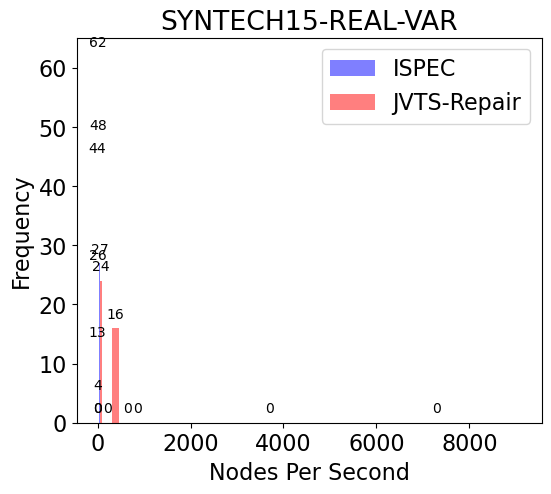

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# title = "SYNTECH15-UNREAL"
title = "SYNTECH15-REAL-VAR"

# column = "NodesExplored"
# column = "UniqueNodesExplored"
# column = "NumRepairs"
# column = "Effectiveness"
# column = "UniqueSols"
# column = "UniqueEffectiveness"
# column = "NodesToFirst"
# column = "DepthToFirst"
# column = "RefsPerDepth"
# column = "MaxDepth"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"
# column = "MinNumVariables"
column = "NodesPerSecond"

# label = "# Nodes explored"
# label = "# Unique nodes explored"
# label = "# Solutions"
# label = "Effectiveness"
# label = "# Unique solutions"
# label = "# Nodes to first repair"
# label = "Depth to first repair"
# label = "# Refinements per depth"
# label = "Maximum depth"
# label = "# y-unsat w/o FALSE"
# label = "MinNumVariables"
label = "Nodes Per Second"

# Determine the number of bins (ranges) for the histogram
# bins = [0, 0.000000001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
# bins = [0, 0.000000001, 0.33, 0.67, 0.99, 1.1]
bins = [0, 0.000000001, 0.1, 1.0000001, 10, 100, 500, 1000, 10000]
# bins = [1, 1.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 0.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 1, 10, 100, 1000, 10000]
# bins = 20

# ranges = (0,100)
# ranges = (0,10)
ranges = (0,20)
# ranges = None

# Set the size of the figure
plt.figure(figsize=(6, 5)) 

# Generate the histogram using the 'hist' function
(n, bins, patches) = plt.hist([df_interpolation[column], df_jvts[column]], bins=bins, range=ranges, alpha=0.5, label=['ISPEC', 'JVTS-Repair'], color=['blue', 'red'])

for i in range(len(patches)):
    for patch in patches[i]:
        x = patch.get_x() + patch.get_width() / 2  # x-coordinate of the bar's center
        y = patch.get_height()  # height of the bar
        plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)  

print()
print("ISPEC")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[0][i]}")

print()
print("JVTS-Repair")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[1][i]}")

# Add labels and title
plt.rcParams.update({'font.size': 16})
plt.xlabel(label)
plt.ylabel('Frequency')
plt.title(title)

# Set xticks and rotate labels
# plt.xticks(range(0, 6500, 500), rotation=45)
# plt.xticks(range(0, 5000, 500), rotation=45)
# plt.xticks([i/100 for i in range(0, 110, 10)], rotation=45)

# plt.yticks(range(0, 130, 10))

# Add legend
plt.legend()

# Show the plot
plt.show()


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

specs_folder = "inputs/SYNTECH15-UNREAL"
# specs_folder = "inputs/SYNTECH15-1UNREAL"

specs = []
specs.extend(sorted([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')]))
# specs.sort()

df = pd.DataFrame({"Filename": specs})
# df.to_csv("outputs/reasons.csv", index=None)

print(len(df))

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_interpolation = df_interpolation.groupby('Benchmark').agg({
    'NumInterpolantsComputed': 'sum',
    'NumNonStateSeparable': 'sum',
    'NumFullyNonIOSeparable': 'sum',
}).reset_index()

df_interpolation["PercentageNSS"] = round(df_interpolation["NumNonStateSeparable"] / df_interpolation["NumInterpolantsComputed"] * 100, 2)
df_interpolation["PercentageNIO"] = round(df_interpolation["NumFullyNonIOSeparable"] / df_interpolation["NumInterpolantsComputed"] * 100, 2)
df_interpolation = df_interpolation.reindex([2, 0, 1, 4, 3])

df_interpolation[["Benchmark", "NumInterpolantsComputed", "NumNonStateSeparable", "PercentageNSS", "NumFullyNonIOSeparable", "PercentageNIO"]]

162


,Benchmark,NumInterpolantsComputed,NumNonStateSeparable,PercentageNSS,NumFullyNonIOSeparable,PercentageNIO
2,SIMPLE,21.2,3.7,17.45,0.9,4.25
0,AMBA-1,355.1,50.6,14.25,0.0,0.00
1,AMBA-2,165.1,10.5,6.36,0.5,0.30
4,SYNTECH15-UNREAL,2468.3,3.6,0.15,33.2,1.35
3,SYNTECH15-1UNREAL,4216.4,71.6,1.70,15.3,0.36


In [22]:
# (df_interpolation['Effectiveness'] == df_jvts['Effectiveness']).value_counts() # 37 41
(df_interpolation['UniqueEffectiveness'] == df_jvts['UniqueEffectiveness']).value_counts() # 47 30
# df_interpolation

False    78
True     40
Name: UniqueEffectiveness, dtype: int64

In [11]:
# (df_interpolation['DepthToFirst'] == df_jvts['DepthToFirst']).value_counts() # 21 41
(df_interpolation['NodesToFirst'] > df_jvts['NodesToFirst']).value_counts() # 28 49
# df_interpolation[df_interpolation['DepthToFirst'] == df_jvts['DepthToFirst']]
# df_interpolation

False    90
True     28
Name: NodesToFirst, dtype: int64


ISPEC
Bin 1: 1.0 - 11.0 	 Frequency: 9.0
Bin 2: 11.0 - 101.0 	 Frequency: 0.0
Bin 3: 101.0 - 1001.0 	 Frequency: 0.0
Bin 4: 1001.0 - 10001.0 	 Frequency: 0.0
Bin 5: 10001.0 - 40001.0 	 Frequency: 0.0
Bin 6: 40001.0 - 200001.0 	 Frequency: 0.0
Bin 7: 200001.0 - 500001.0 	 Frequency: 0.0
Bin 8: 500001.0 - 4000001.0 	 Frequency: 0.0
Bin 9: 4000001.0 - 10000001.0 	 Frequency: 0.0

JVTS-Repair
Bin 1: 1.0 - 11.0 	 Frequency: 2.0
Bin 2: 11.0 - 101.0 	 Frequency: 3.0
Bin 3: 101.0 - 1001.0 	 Frequency: 1.0
Bin 4: 1001.0 - 10001.0 	 Frequency: 0.0
Bin 5: 10001.0 - 40001.0 	 Frequency: 0.0
Bin 6: 40001.0 - 200001.0 	 Frequency: 0.0
Bin 7: 200001.0 - 500001.0 	 Frequency: 0.0
Bin 8: 500001.0 - 4000001.0 	 Frequency: 0.0
Bin 9: 4000001.0 - 10000001.0 	 Frequency: 0.0

GLASS
Bin 1: 1.0 - 11.0 	 Frequency: 4.0
Bin 2: 11.0 - 101.0 	 Frequency: 3.0
Bin 3: 101.0 - 1001.0 	 Frequency: 4.0
Bin 4: 1001.0 - 10001.0 	 Frequency: 0.0
Bin 5: 10001.0 - 40001.0 	 Frequency: 1.0
Bin 6: 40001.0 - 200001.0 	 Frequ

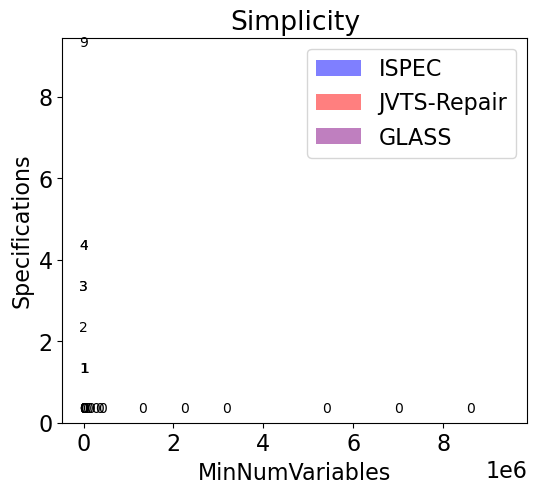

set()

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)

specs = []
# specs.extend([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')])
# specs.extend([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')])
# specs.extend([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')])
# specs.extend([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')])

df = pd.DataFrame({"Filename": specs})

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")

df_glass = pd.read_csv("outputs-symbolic/GLASS/repairs_average.csv")
df_glass = df.merge(df_glass, how="left", on="Filename")

title = "Simplicity"

column = "MinNumVariables"
label = "MinNumVariables"

# Determine the number of bins (ranges) for the histogram
# bins = [0, 0.000000001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
# bins = [0, 0.000000001, 0.33, 0.67, 0.99, 1.1]
# bins = [1, 1.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 0.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 1, 10, 100, 1000, 10000]
bins = [1, 11, 101, 1001, 10001, 40001, 200001, 500001, 4000001, 10000001]
# bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000, 40000, 200000, 500000, 4000000, 10000000]
# bins = 10

# ranges = (0,100)
# ranges = (0,10)
# ranges = (0,20)
ranges = None

# Set the size of the figure
plt.figure(figsize=(6, 5)) 

# Generate the histogram using the 'hist' function
(n, bins, patches) = plt.hist([df_interpolation[column], df_jvts[column], df_glass[column]], bins=bins, range=ranges, alpha=0.5, label=['ISPEC', 'JVTS-Repair', 'GLASS'], color=['blue', 'red', 'purple'])

for i in range(len(patches)):
    for patch in patches[i]:
        x = patch.get_x() + patch.get_width() / 2  # x-coordinate of the bar's center
        y = patch.get_height()  # height of the bar
        plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)  

print()
print("ISPEC")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[0][i]}")

print()
print("JVTS-Repair")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[1][i]}")

print()
print("GLASS")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[2][i]}")

# Add labels and title
plt.rcParams.update({'font.size': 16})
plt.xlabel(label)
plt.ylabel('Specifications')
plt.title(title)

# Set xticks and rotate labels
# plt.xticks(range(0, 6500, 500), rotation=45)
# plt.xticks(range(0, 5000, 500), rotation=45)
# plt.xticks([i/100 for i in range(0, 110, 10)], rotation=45)

# plt.yticks(range(0, 130, 10))

# Add legend
plt.legend()

# Show the plot
plt.show()

# df_glass[["Filename", column]].sort_values(by=column)
df_glass[["Filename", "MinNumVariables"]]
set(df_glass[df_glass["NumRepairs"] > 0]["Filename"]) - set(df_glass[df_glass["MinNumVariables"] > 0]["Filename"])


ISPEC
Bin 1: 1.0 - 2.0 	 Frequency: 66.0
Bin 2: 2.0 - 3.0 	 Frequency: 11.0
Bin 3: 3.0 - 4.0 	 Frequency: 10.0
Bin 4: 4.0 - 5.0 	 Frequency: 4.0
Bin 5: 5.0 - 6.0 	 Frequency: 2.0
Bin 6: 6.0 - 7.0 	 Frequency: 0.0
Bin 7: 7.0 - 8.0 	 Frequency: 3.0
Bin 8: 8.0 - 9.0 	 Frequency: 0.0
Bin 9: 9.0 - 10.0 	 Frequency: 0.0
Bin 10: 10.0 - 100.0 	 Frequency: 0.0
Bin 11: 100.0 - 1000.0 	 Frequency: 0.0

JVTS-Repair
Bin 1: 1.0 - 2.0 	 Frequency: 28.0
Bin 2: 2.0 - 3.0 	 Frequency: 19.0
Bin 3: 3.0 - 4.0 	 Frequency: 12.0
Bin 4: 4.0 - 5.0 	 Frequency: 11.0
Bin 5: 5.0 - 6.0 	 Frequency: 2.0
Bin 6: 6.0 - 7.0 	 Frequency: 0.0
Bin 7: 7.0 - 8.0 	 Frequency: 0.0
Bin 8: 8.0 - 9.0 	 Frequency: 0.0
Bin 9: 9.0 - 10.0 	 Frequency: 0.0
Bin 10: 10.0 - 100.0 	 Frequency: 2.0
Bin 11: 100.0 - 1000.0 	 Frequency: 1.0

GLASS
Bin 1: 1.0 - 2.0 	 Frequency: 119.0
Bin 2: 2.0 - 3.0 	 Frequency: 6.0
Bin 3: 3.0 - 4.0 	 Frequency: 1.0
Bin 4: 4.0 - 5.0 	 Frequency: 0.0
Bin 5: 5.0 - 6.0 	 Frequency: 0.0
Bin 6: 6.0 - 7.0 	 Frequ

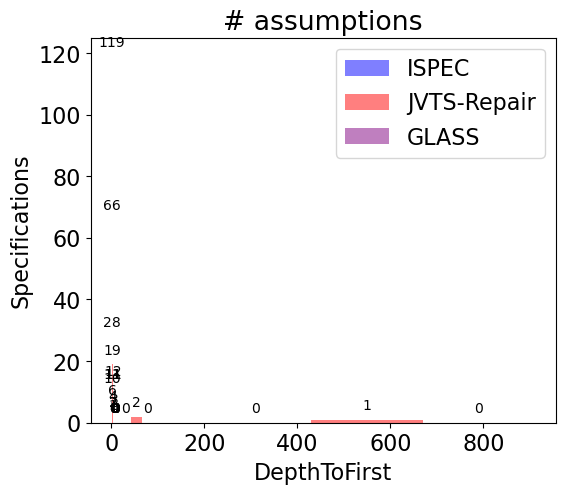

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

specs = []
specs.extend([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')])

df = pd.DataFrame({"Filename": specs})

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")

df_glass = pd.read_csv("outputs-symbolic/GLASS/repairs_average.csv")
df_glass = df.merge(df_glass, how="left", on="Filename")

title = "# assumptions"

column = "DepthToFirst"

label = "DepthToFirst"

# Determine the number of bins (ranges) for the histogram
# bins = [0, 0.000000001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
# bins = [0, 0.000000001, 0.33, 0.67, 0.99, 1.1]
# bins = [1, 1.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 0.0000001, 10, 100, 500, 1000, 10000]
# bins = [0, 1, 10, 100, 1000, 10000]
# bins = [1, 10, 100, 1000, 10000, 40000, 200000, 500000, 4000000, 10000000]
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]
# bins = 10

# ranges = (0,100)
# ranges = (0,10)
# ranges = (0,20)
ranges = None

# Set the size of the figure
plt.figure(figsize=(6, 5)) 

# Generate the histogram using the 'hist' function
(n, bins, patches) = plt.hist([df_interpolation[column], df_jvts[column], df_glass["MinNumAssumptions"]], bins=bins, range=ranges, alpha=0.5, label=['ISPEC', 'JVTS-Repair', 'GLASS'], color=['blue', 'red', 'purple'])

for i in range(len(patches)):
    for patch in patches[i]:
        x = patch.get_x() + patch.get_width() / 2  # x-coordinate of the bar's center
        y = patch.get_height()  # height of the bar
        plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)  

print()
print("ISPEC")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[0][i]}")

print()
print("JVTS-Repair")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[1][i]}")

print()
print("GLASS")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[2][i]}")

# Add labels and title
plt.rcParams.update({'font.size': 16})
plt.xlabel(label)
plt.ylabel('Specifications')
plt.title(title)

# Set xticks and rotate labels
# plt.xticks(range(0, 6500, 500), rotation=45)
# plt.xticks(range(0, 5000, 500), rotation=45)
# plt.xticks([i/100 for i in range(0, 110, 10)], rotation=45)

# plt.yticks(range(0, 130, 10))

# Add legend
plt.legend()

# Show the plot
plt.show()

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

specs = []
specs.extend([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')])

df = pd.DataFrame({"Filename": specs})

In [8]:
df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")

df_glass = pd.read_csv("outputs-symbolic/GLASS/repairs_average.csv")
df_glass = df.merge(df_glass, how="left", on="Filename")

df_jvts[["Filename", "NumRepairs", "NodesExplored", "Effectiveness", "UniqueSols", "UniqueNodesExplored", "UniqueEffectiveness", "DepthToFirst"]].sort_values(by=["DepthToFirst"])

,Filename,NumRepairs,NodesExplored,Effectiveness,UniqueSols,UniqueNodesExplored,UniqueEffectiveness,DepthToFirst
0,RG.spectra,7.0,10.0,0.700000,4.0,7.0,0.571429,1.0
61,GyroLTL_486_GyroAspect_3.spectra,7.0,10.0,0.700000,5.0,8.0,0.625000,1.0
62,GyroLTL_700_GyroAspect_fixed_3.spectra,50.0,491.2,0.100713,23.9,447.2,0.053229,1.0
79,GyroLTL_390_GyroAspect_4.spectra,1.0,2.0,0.500000,1.0,2.0,0.500000,1.0
87,PCarLTL_Unrealizable_V_20_882_PCar_fixed_1.spe...,289.0,653.0,0.442573,135.0,499.0,0.270541,1.0
...,...,...,...,...,...,...,...,...
150,ColorSortLTL3_688_ColorSort_fixed_7.spectra,0.0,367.3,0.000000,0.0,366.9,0.000000,NaN
152,ColorSortLTL3_646_ColorSort_fixed_1.spectra,0.0,906.4,0.000000,0.0,901.5,0.000000,NaN
154,ColorSortLTL3_687_ColorSort_fixed_3.spectra,0.0,187.7,0.000000,0.0,180.0,0.000000,NaN
156,ColorSortLTL3_682_ColorSort_fixed_2.spectra,0.0,61.0,0.000000,0.0,61.0,0.000000,NaN


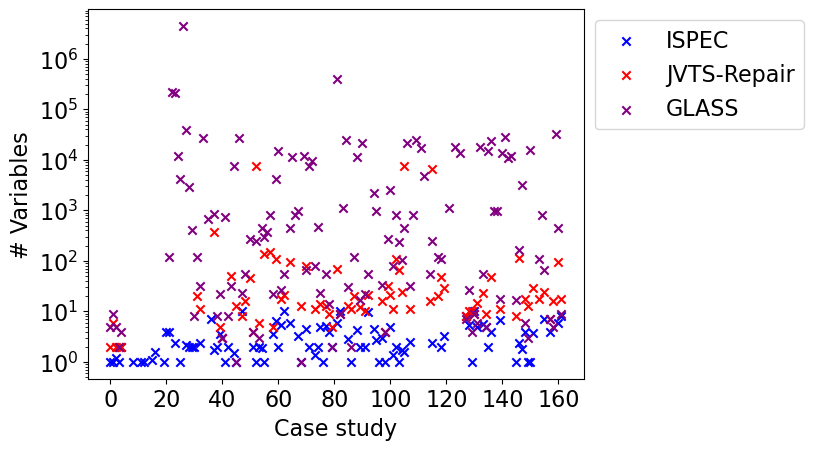

In [9]:

column = "MinNumVariables"

label = "# Variables"

marker = "x"

x_ticks = range(len(df))

plt.rcParams.update({'font.size': 16})

# Plot the data with specified colors
plt.scatter(x_ticks, df_interpolation[column], label='ISPEC', color='blue', marker=marker)
plt.scatter(x_ticks, df_jvts[column], label='JVTS-Repair', color='red', marker=marker)
plt.scatter(x_ticks, df_glass[column], label='GLASS', color='purple', marker=marker)

# Add labels and title
plt.xlabel('Case study')
plt.ylabel(label)

x_ticks = list(range(0, len(df_interpolation), 20))
plt.xticks(x_ticks)
plt.yscale('log')

# Place legend on the right outside of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [95]:
bins = [0, 1, 10, 100, float('inf')]
labels = ['<1s', '1s-10s', '10s-100s', '>100s']

# df = df_interpolation
# df = df_jvts
df = df_glass

# Add a new column with the categories
df['Interval'] = pd.cut(df['TimeToFirst'], bins=bins, labels=labels, right=False)
df['Interval'] = df['Interval'].cat.add_categories('Unrepaired')
df['Interval'].fillna('Unrepaired', inplace=True)

df['Interval'].value_counts()

<1s           129
Unrepaired     20
10s-100s        6
1s-10s          4
>100s           3
Name: Interval, dtype: int64

In [86]:
pd.set_option('display.max_rows', None)
df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
# df_interpolation['TotalTimeCounterstrategy2'] = df_interpolation['Runtime'] - (df_interpolation['TotalTimeGenerationMethod'] + df_interpolation['TotalTimeOthers'])
# df_interpolation = df_interpolation[df_interpolation['TotalTimeCounterstrategy'] > 0]
# df_interpolation = df_interpolation[df_interpolation['TotalTimeGenerationMethod'] > 0]
# df_interpolation = df_interpolation[df_interpolation['TotalTimeCounterstrategy2'] > df_interpolation['TotalTimeGenerationMethod']]

# df_interpolation['TotalTime'] = df_interpolation['TotalTimeCounterstrategy'] + df_interpolation['TotalTimeGenerationMethod']

# df_interpolation = df_interpolation[df_interpolation['Filename'].str.startswith("Color")]
# df_interpolation = df_interpolation[df_interpolation['TotalTimeGenerationMethod'] == None]
# df_interpolation

162
LEN: 0
Empty DataFrame
Columns: [Filename, Benchmark, DepthToFirst, DuplicateNodes, Effectiveness, MaxDepth, NodesExplored, NodesToFirst, NumFullyNonIOSeparable, NumInterpolantsComputed, NumNonStateSeparable, NumRepairs, NumYUnsat, RefsPerDepth, Runtime, TimeToFirst, TimedOut, TotalTimeCounterstrategy, TotalTimeCounterstrategyComputed, TotalTimeGenerationMethod, UniqueEffectiveness, UniqueNodesExplored, UniqueSols, Runs]
Index: []

[0 rows x 24 columns]

LEN: 60
                                              Filename          Benchmark  \
0                                           RG.spectra             SIMPLE   
1                                         Lift.spectra             SIMPLE   
2                                          RG1.spectra             SIMPLE   
3                                          RG2.spectra             SIMPLE   
4                                          LGS.spectra             SIMPLE   
21         amba_ahb_wo_ass_fairness_amba_ahb_1.spectra             

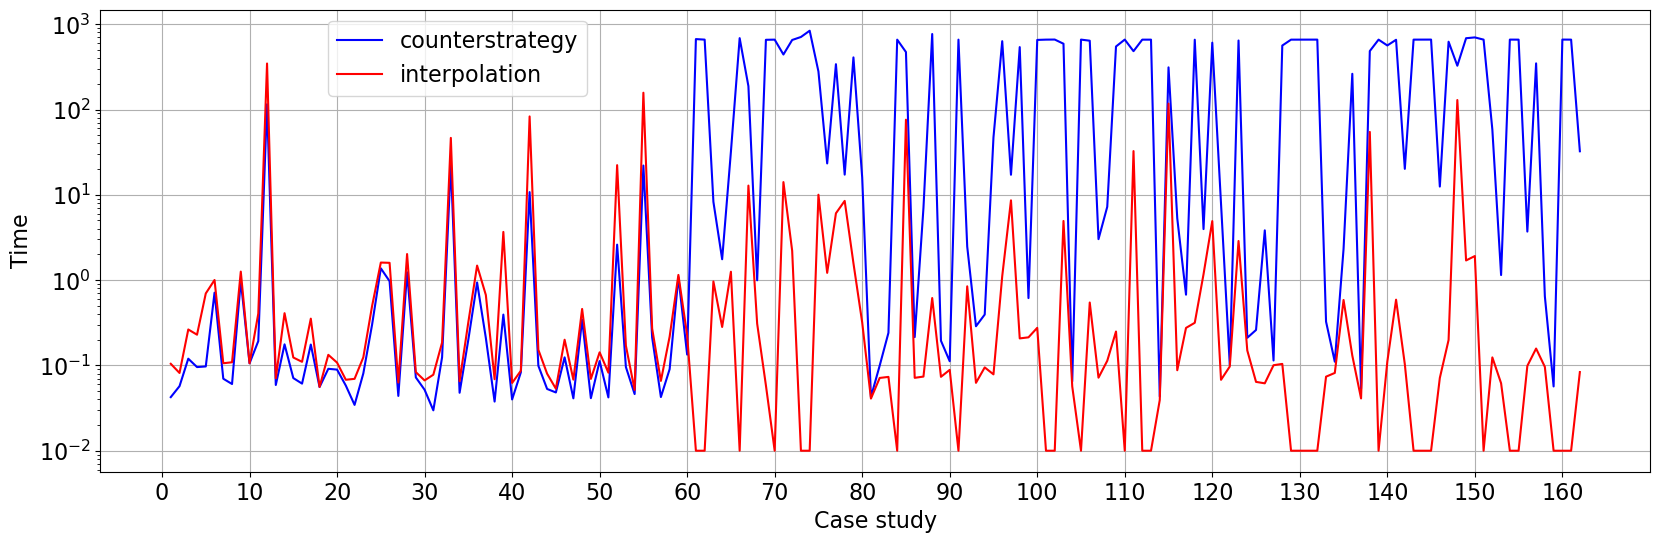

In [33]:
x_ticks = range(1, len(df_interpolation)+1)

print(len(df_interpolation))

plt.figure(figsize=(20, 6))
plt.rcParams.update({'font.size': 16})

condition_1 = df_interpolation["TotalTimeCounterstrategyComputed"] == df_interpolation["TotalTimeGenerationMethod"]
condition_2 = df_interpolation["TotalTimeCounterstrategyComputed"] < df_interpolation["TotalTimeGenerationMethod"]
condition_3 = df_interpolation["TotalTimeCounterstrategyComputed"] > df_interpolation["TotalTimeGenerationMethod"]

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

print("LEN:", len(df_interpolation[condition_1]))
print(df_interpolation[condition_1])
print()
print("LEN:", len(df_interpolation[condition_2]))
print(df_interpolation[condition_2])
print()
print("LEN:", len(df_interpolation[condition_3]))
print(df_interpolation[condition_3])
print()

df_interpolation = pd.concat([df_interpolation[condition_1], df_interpolation[condition_2], df_interpolation[condition_3]])

# Plot the data with specified colors
# plt.plot(x_ticks, df_interpolation["TotalTimeCounterstrategyComputed"] / df_interpolation["Runtime"] * 100, label='counterstrategy', color='blue')
# plt.plot(x_ticks, df_interpolation["TotalTimeGenerationMethod"] / df_interpolation["Runtime"] * 100, label='interpolation', color='red')

# epsilon = 0
epsilon = 1e-2

plt.plot(x_ticks, df_interpolation["TotalTimeCounterstrategyComputed"] + epsilon, label='counterstrategy', color='blue')
plt.plot(x_ticks, df_interpolation["TotalTimeGenerationMethod"] + epsilon, label='interpolation', color='red')

# Add labels and title
plt.xlabel('Case study')
# plt.ylabel('% time spent')
plt.ylabel('Time')

x_ticks = list(range(0, len(df_interpolation), 10))
plt.xticks(x_ticks)
# plt.yticks([i for i in range(0, 101, 10)])
plt.yscale('log')

plt.legend(loc='upper left', bbox_to_anchor=(0.14, 1))

# Show the plot
plt.grid()
plt.show()

df_filter = df_interpolation[condition_3]
df_filter = df_filter[(df_filter["TotalTimeCounterstrategyComputed"] > 600) & (df_filter["NodesExplored"] <= 2)]
df_filter.to_csv("test.csv")


ISPEC
Bin 1: 0.0 - 0.1 	 Frequency: 0.0
Bin 2: 0.1 - 1.0 	 Frequency: 52.0
Bin 3: 1.0 - 10.0 	 Frequency: 22.0
Bin 4: 10.0 - 101.0 	 Frequency: 12.0
Bin 5: 101.0 - 10000001.0 	 Frequency: 10.0

JVTS-Repair
Bin 1: 0.0 - 0.1 	 Frequency: 26.0
Bin 2: 0.1 - 1.0 	 Frequency: 28.0
Bin 3: 1.0 - 10.0 	 Frequency: 15.0
Bin 4: 10.0 - 101.0 	 Frequency: 4.0
Bin 5: 101.0 - 10000001.0 	 Frequency: 2.0

GLASS
Bin 1: 0.0 - 0.1 	 Frequency: 104.0
Bin 2: 0.1 - 1.0 	 Frequency: 25.0
Bin 3: 1.0 - 10.0 	 Frequency: 4.0
Bin 4: 10.0 - 101.0 	 Frequency: 6.0
Bin 5: 101.0 - 10000001.0 	 Frequency: 3.0


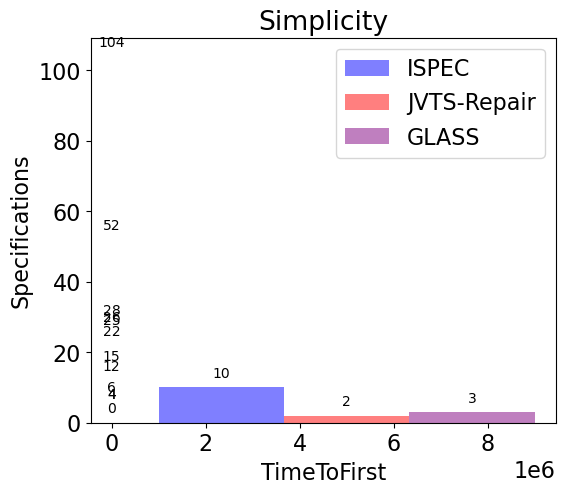

{'amba02.spectra',
 'amba02_noassumptions.spectra',
 'amba02_nosafety.spectra',
 'amba02_nosafety0.spectra',
 'amba02_nosafety1.spectra',
 'amba02_nosafety_nofairness.spectra',
 'amba04.spectra',
 'amba04_no_safety.spectra',
 'amba04_no_safety_0.spectra',
 'amba04_noassumptions.spectra',
 'amba04_nosafety_nofairness.spectra',
 'amba08.spectra',
 'amba08_no_safety.spectra',
 'amba08_no_safety_0.spectra',
 'amba08_noassumptions.spectra',
 'amba08_nosafety_nofairness.spectra'}

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)

specs = []
specs.extend([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')])

df = pd.DataFrame({"Filename": specs})

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")

df_glass = pd.read_csv("outputs-symbolic/GLASS/repairs_average.csv")
df_glass = df.merge(df_glass, how="left", on="Filename")

title = "Simplicity"

column = "TimeToFirst"
label = "TimeToFirst"

# Determine the number of bins (ranges) for the histogram
bins = [0, 0.1, 1, 10, 101, 10000001]
# bins = 10

# ranges = (0,100)
# ranges = (0,10)
# ranges = (0,20)
ranges = None

# Set the size of the figure
plt.figure(figsize=(6, 5)) 

# Generate the histogram using the 'hist' function
(n, bins, patches) = plt.hist([df_interpolation[column], df_jvts[column], df_glass[column]], bins=bins, range=ranges, alpha=0.5, label=['ISPEC', 'JVTS-Repair', 'GLASS'], color=['blue', 'red', 'purple'])

for i in range(len(patches)):
    for patch in patches[i]:
        x = patch.get_x() + patch.get_width() / 2  # x-coordinate of the bar's center
        y = patch.get_height()  # height of the bar
        plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)  

print()
print("ISPEC")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[0][i]}")

print()
print("JVTS-Repair")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[1][i]}")

print()
print("GLASS")
# Print bins and their frequencies
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]} \t Frequency: {n[2][i]}")

# Add labels and title
plt.rcParams.update({'font.size': 16})
plt.xlabel(label)
plt.ylabel('Specifications')
plt.title(title)

# Set xticks and rotate labels
# plt.xticks(range(0, 6500, 500), rotation=45)
# plt.xticks(range(0, 5000, 500), rotation=45)
# plt.xticks([i/100 for i in range(0, 110, 10)], rotation=45)

# plt.yticks(range(0, 130, 10))

# Add legend
plt.legend()

# Show the plot
plt.show()

# df_glass[["Filename", column]].sort_values(by=column)
df_glass[["Filename", "MinNumVariables"]]
set(df_glass[df_glass["NumRepairs"] > 0]["Filename"]) - set(df_glass[df_glass["MinNumVariables"] > 0]["Filename"])

In [ ]:
import os
import pandas as pd
import re

def remove_comments(file_contents):
    return re.sub(r"/\*.*?\*/", "", file_contents, flags=re.DOTALL)

def count_keywords(file_contents):
    keyword_counts = {"env ": 0, "sys ": 0, "aux ": 0, "assumption": 0, "guarantee": 0}
    lines = file_contents.split('\n')
    for line in lines:
        for keyword in keyword_counts.keys():
            keyword_counts[keyword] += line.count(keyword)
    return keyword_counts

def process_folder(folder_path):
    data = []
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".spectra"):
                file_path = os.path.join(root, file_name)
                # print(f"Processing file: {file_path}")
                with open(file_path, "r") as file:
                    file_contents = file.read()
                    # cleaned_contents = remove_comments(file_contents)
                    keyword_counts = count_keywords(file_contents)
                    data.append({"File": file_name, **keyword_counts})

    df = pd.DataFrame(data)
    return df


folder_path = "inputs/SYNTECH15-1UNREAL"
result_df = process_folder(folder_path).sort_values("File")

# Read your CSV file into a DataFrame
# Replace 'your_file.csv' with the actual file name
df = result_df

# Filter the DataFrame to include only rows where "File" starts with "System"
system_df = df[df['File'].str.startswith('G')]

# Calculate the min, average, and max for each column
summary = system_df.describe()

# Select the desired columns
columns_of_interest = ['env ', 'sys ', 'aux ', 'assumption', 'guarantee']

# Select the rows corresponding to min, mean (average), and max
dff = summary.loc[['min', 'mean', 'max'], columns_of_interest]

dff

/tmp/ipykernel_11344/2356617924.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


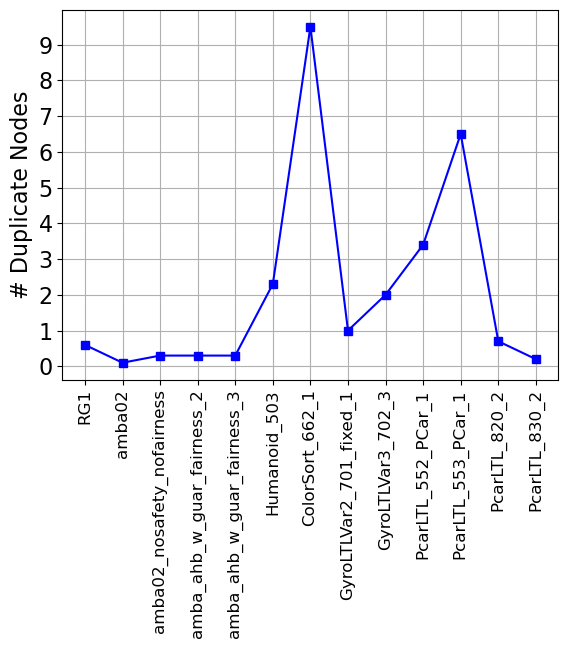

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    "inputs/AMBA-1",
    "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')


df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)
df_interpolation = df_interpolation[df_interpolation["DuplicateNodes"] > 0]

column = "DuplicateNodes"
label = "# Duplicate Nodes"

x_ticks = range(1, len(df_interpolation)+1)

plt.rcParams.update({'font.size': 16})

marker = "s" if len(df_interpolation) < 20 else None

# plt.yscale('symlog', linthresh=1)

plt.ylabel(label)

plt.yticks([i for i in range(10)])
plt.xticks(x_ticks, df_interpolation['Specification'], rotation=90, fontsize=12)

plt.grid()

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column], label='ISPEC', color='blue', marker=marker)


/tmp/ipykernel_11344/538825214.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


,Filename,Specification,Benchmark,DepthToFirst,Effectiveness,MinNumVariables,NodesExplored,NodesToFirst,NumRepairs,NumYUnsat,RefsPerDepth,Runtime,TimeToFirst,UniqueEffectiveness,UniqueNodesExplored,UniqueSols,Runs,DuplicateNodes,UniqueEffectivenessNew
1,Lift.spectra,Lift,SIMPLE,1.0,0.822268,6.0,980.0,4.0,805.0,7.0,65.333333,5.4818,0.0393,0.559494,396.0,221.0,10,584.0,0.225741
2,RG.spectra,RG,SIMPLE,1.0,0.777778,2.0,10.0,4.0,7.0,0.0,3.333333,0.0320,0.0259,0.666667,7.0,4.0,10,3.0,0.444444
3,RG1.spectra,RG1,SIMPLE,2.0,0.753582,2.0,350.0,9.0,263.0,0.0,43.750000,0.8362,0.0488,0.576355,204.0,117.0,10,146.0,0.335244
4,RG2.spectra,RG2,SIMPLE,3.0,0.681818,2.0,23.0,9.0,15.0,0.0,5.750000,0.0685,0.0478,0.631579,20.0,12.0,10,3.0,0.545455
5,amba02.spectra,amba02,AMBA-1,0.0,0.000000,0.0,240.0,0.0,0.0,0.0,60.000000,635.9182,-0.0010,0.000000,215.1,0.0,10,24.9,0.000000
6,amba02_noassumptions.spectra,amba02_noassumptions,AMBA-1,0.0,0.000000,0.0,456.6,0.0,0.0,0.0,6.714706,639.9114,-0.0010,0.000000,426.4,0.0,10,30.2,0.000000
7,amba02_nosafety.spectra,amba02_nosafety,AMBA-1,0.0,0.000000,0.0,140.0,0.0,0.0,0.0,46.666667,657.2512,-0.0010,0.000000,133.3,0.0,10,6.7,0.000000
8,amba02_nosafety0.spectra,amba02_nosafety0,AMBA-1,0.0,0.000000,0.0,146.8,0.0,0.0,0.0,48.933333,650.2004,-0.0010,0.000000,141.6,0.0,10,5.2,0.000000
9,amba02_nosafety1.spectra,amba02_nosafety1,AMBA-1,0.0,0.000000,0.0,137.7,0.0,0.0,0.0,45.900000,658.2824,-0.0010,0.000000,131.9,0.0,10,5.8,0.000000
10,amba02_nosafety_nofairness.spectra,amba02_nosafety_nofairness,AMBA-1,0.0,0.000000,0.0,391.7,0.0,0.0,0.0,97.925000,634.1712,-0.0010,0.000000,344.2,0.0,10,47.5,0.000000


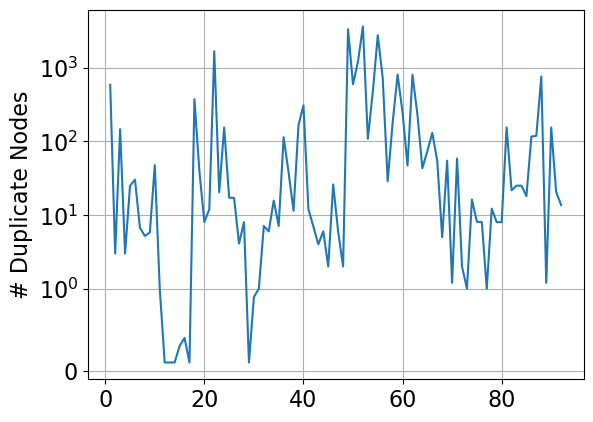

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    "inputs/AMBA-1",
    "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL",
]

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)
df_jvts["DuplicateNodes"] = df_jvts["NodesExplored"] - df_jvts["UniqueNodesExplored"]
df_jvts = df_jvts[df_jvts["DuplicateNodes"] > 0]

column = "DuplicateNodes"
label = "# Duplicate Nodes"

x_ticks = range(1, len(df_jvts)+1)

plt.rcParams.update({'font.size': 16})

marker = "s" if len(df) < 20 else None

plt.yscale('symlog', linthresh=1)

plt.ylabel(label)

# plt.yticks([i for i in range(10)])
# plt.xticks(x_ticks, df_jvts['Specification'], rotation=90, fontsize=12)

plt.grid()

# Plot the data with specified colors
plt.plot(x_ticks, df_jvts[column], label='JVTS-Repair', marker=marker)

df_jvts["UniqueEffectivenessNew"] = df_jvts["UniqueSols"] / (df_jvts["NodesExplored"] - 1)

df_jvts

/tmp/ipykernel_1793/3138175427.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


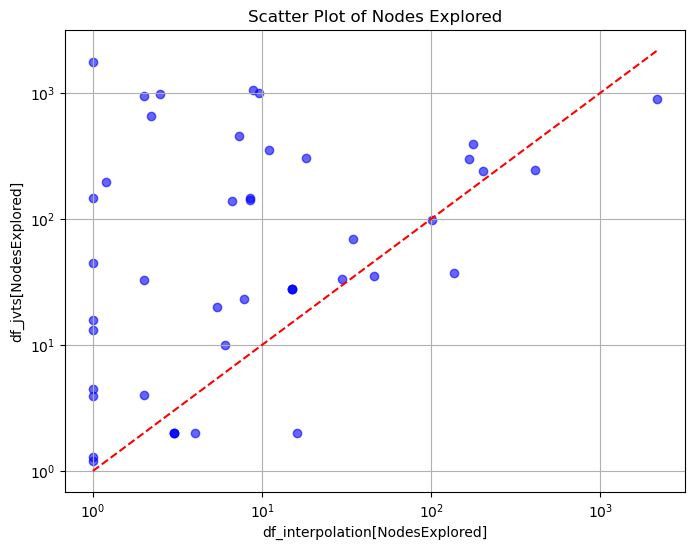

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    "inputs/SIMPLE",
    "inputs/AMBA-1",
    "inputs/AMBA-2",
    "inputs/SYNTECH15-UNREAL",
    # "inputs/SYNTECH15-1UNREAL",
]

title = "SIMPLE"
# title = "AMBA-CAV17"
# title = "AMBA-SYM19"
# title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()
# print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

column = "NodesExplored"

label = "# Nodes Explored"

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

plt.figure(figsize=(8,6))
plt.scatter(df_interpolation["NodesExplored"], df_jvts["NodesExplored"], color="b", alpha=0.6)

x_vals = np.linspace(1, max(df_interpolation["NodesExplored"].max(), df_jvts["NodesExplored"].max()), 100)
plt.plot(x_vals, x_vals, color="red", linestyle="--", label="x = y Line")  # Diagonal line

plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)


plt.xlabel("df_interpolation[NodesExplored]")
plt.ylabel("df_jvts[NodesExplored]")
plt.title("Scatter Plot of Nodes Explored")
plt.grid(True)
plt.show()

/tmp/ipykernel_1793/2359221291.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Specification'] = df['Filename'].str.replace('.spectra', '')


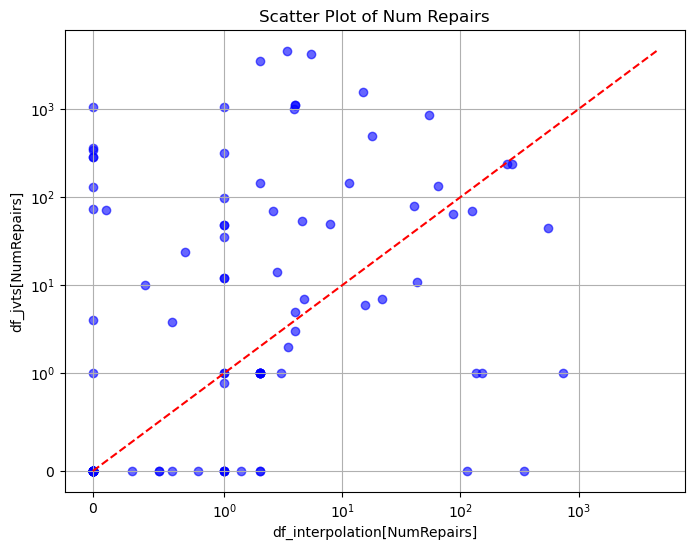

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 10)

directories = [
    # "inputs/SIMPLE",
    # "inputs/AMBA-1",
    # "inputs/AMBA-2",
    # "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL",
]

title = "SIMPLE"
# title = "AMBA-CAV17"
# title = "AMBA-SYM19"
# title = "SYNTECH15-UNREAL"
# title = "SYNTECH15-REAL-VAR"

# Generate the list of filenames and corresponding systems
specs = [f for directory in directories 
         for f in sorted(os.listdir(directory)) if f.endswith('.spectra')]

# Convert to DataFrame
df = pd.DataFrame(specs, columns=["Filename"])
# df["System"] = df["Filename"].apply(lambda x: x[0])

amba_files_order = [
    "amba02.spectra",
    "amba02_nosafety0.spectra",
    "amba02_nosafety1.spectra",
    "amba02_nosafety.spectra",
    "amba02_nosafety_nofairness.spectra",
    "amba02_noassumptions.spectra",
    "amba04.spectra",
    "amba04_no_safety_0.spectra",
    "amba04_no_safety.spectra",
    "amba04_nosafety_nofairness.spectra",
    "amba04_noassumptions.spectra",
    "amba08.spectra",
    "amba08_no_safety_0.spectra",
    "amba08_no_safety.spectra",
    "amba08_nosafety_nofairness.spectra",
    "amba08_noassumptions.spectra",
]

# df = df.set_index("Filename").reindex(amba_files_order).reset_index()
# print(df)

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)

column = "NodesExplored"

label = "# Nodes Explored"

# Remove the '.spectra' extension from filenames for display
df['Specification'] = df['Filename'].str.replace('.spectra', '')

df['Specification'] = df['Specification'].str.replace('_amba_ahb', '')

df['Specification'] = df['Specification'].str.replace('ColorSortLTL3', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort_fixed', '')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable1', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('ColorSortLTLUnrealizable2', 'ColorSort')
df['Specification'] = df['Specification'].str.replace('_ColorSort', '')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var1', 'Gyro')
df['Specification'] = df['Specification'].str.replace('GyroUnrealizable_Var2', 'Gyro')
df['Specification'] = df['Specification'].str.replace('_GyroAspect', '')
df['Specification'] = df['Specification'].str.replace('HumanoidLTL', 'Humanoid')
df['Specification'] = df['Specification'].str.replace('_Humanoid_fixed', '')
df['Specification'] = df['Specification'].str.replace('_Humanoid', '')
df['Specification'] = df['Specification'].str.replace('_NotRealizable2', '')
df['Specification'] = df['Specification'].str.replace('LTL_Unrealizable_V_2_unrealizable0', '')
df['Specification'] = df['Specification'].str.replace('_PCar_fixed', '')

df['Specification'] = df['Specification'].str.replace('_unrealizable', '')


df['Specification'] = df['Specification'].str.replace('no_safety_', 'nosafety')
df['Specification'] = df['Specification'].str.replace('no_safety', 'nosafety')

plt.figure(figsize=(8,6))
plt.scatter(df_interpolation["NumRepairs"], df_jvts["NumRepairs"], color="b", alpha=0.6)

x_vals = np.linspace(0, max(df_interpolation["NumRepairs"].max(), df_jvts["NumRepairs"].max()), 100)
plt.plot(x_vals, x_vals, color="red", linestyle="--", label="x = y Line")  # Diagonal line

plt.xscale('symlog', linthresh=1)
plt.yscale('symlog', linthresh=1)


plt.xlabel("df_interpolation[NumRepairs]")
plt.ylabel("df_jvts[NumRepairs]")
plt.title("Scatter Plot of Num Repairs")
plt.grid(True)
plt.show()